Step 1: Read the Image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/IMAGE.jpg')  # Replace 'image.jpg' with your image file


Step 2: Display the Image

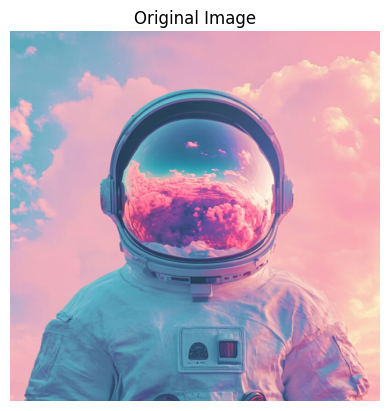

In [2]:
# Convert BGR to RGB for correct visualization
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.title("Original Image")
plt.show()


Step 3: Extract Image Size

In [3]:
height, width, channels = image.shape
print(f"Image Dimensions: Width={width}, Height={height}, Channels={channels}")


Image Dimensions: Width=800, Height=800, Channels=3


Step 4: Calculate Image Pixels

In [4]:
total_pixels = height * width
print(f"Total number of pixels: {total_pixels}")


Total number of pixels: 640000


Step 5: Convert RGB to Grayscale

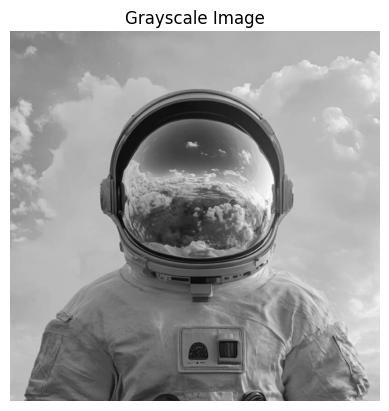

In [5]:
# Convert BGR to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.jpg', gray_image)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()

Step 6: Convert RGB to Binary Image using Thresholding

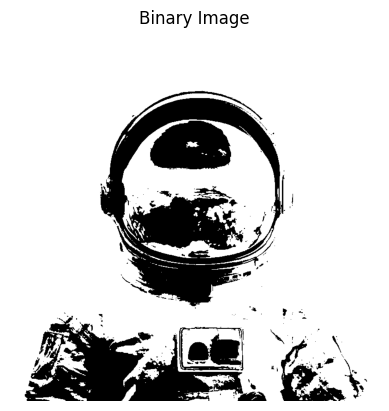

Number of black pixels: 134141
Image size (total pixels): 640000


In [6]:
threshold_value = 128
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite('binary_image.jpg', binary_image)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.title("Binary Image")
plt.show()
black_pixels = np.sum(binary_image == 0)
print(f"Number of black pixels: {black_pixels}")
print(f"Image size (total pixels): {total_pixels}")

#Task 2: Edge Detection and Segmentation

1. Edge Detection

(i) Sobel Operator

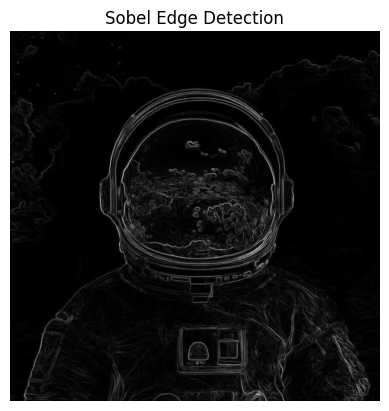

In [7]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)
plt.imshow(sobel_edge, cmap='gray')
plt.axis('off')
plt.title("Sobel Edge Detection")
plt.show()

(ii) Prewitt Operator

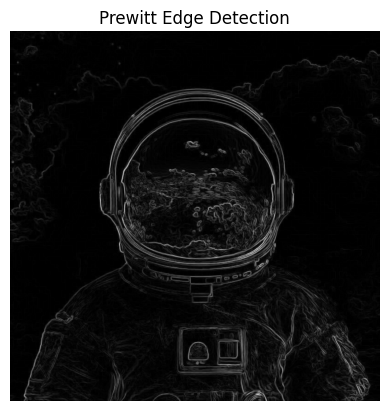

In [17]:
prewitt_x = cv2.filter2D(gray_image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(gray_image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt_edge = cv2.magnitude(prewitt_x, prewitt_y)
plt.imshow(prewitt_edge, cmap='gray')
plt.axis('off')
plt.title("Prewitt Edge Detection")
plt.show()


(iii) Roberts Cross Operator

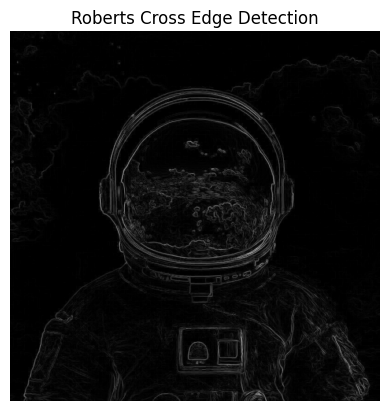

In [9]:
from skimage.filters import roberts
roberts_edge = roberts(gray_image)
plt.imshow(roberts_edge, cmap='gray')
plt.axis('off')
plt.title("Roberts Cross Edge Detection")
plt.show()

(iv) Canny Edge Detector

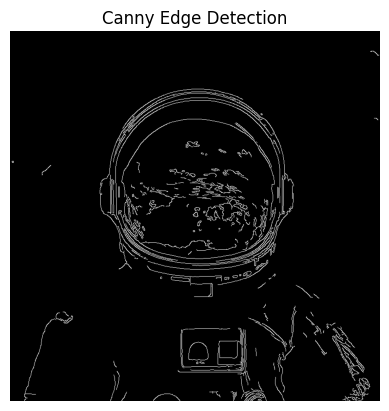

In [10]:
canny_edge = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny_edge, cmap='gray')
plt.axis('off')
plt.title("Canny Edge Detection")
plt.show()

2. Image Segmentation
(i) Global Thresholding

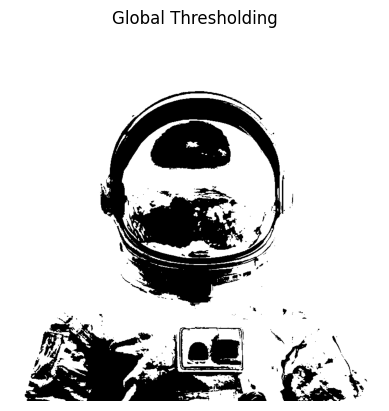

In [13]:
_, thresh_global = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_global, cmap='gray')
plt.axis('off')
plt.title("Global Thresholding")
plt.show()

(ii) Adaptive Thresholding

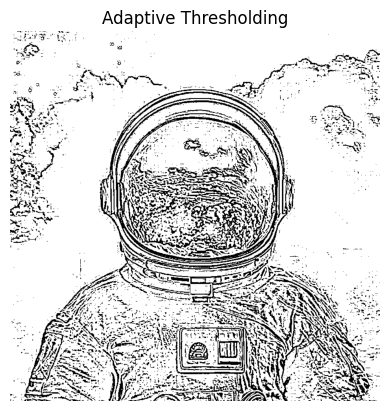

In [14]:
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')
plt.title("Adaptive Thresholding")
plt.show()

(iii) Edge Detection for Segmentation (Canny)

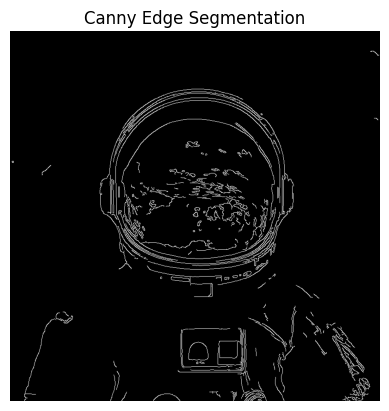

In [15]:
plt.imshow(canny_edge, cmap='gray')
plt.axis('off')
plt.title("Canny Edge Segmentation")
plt.show()

(iv) Region-Based Segmentation (Watershed Algorithm)

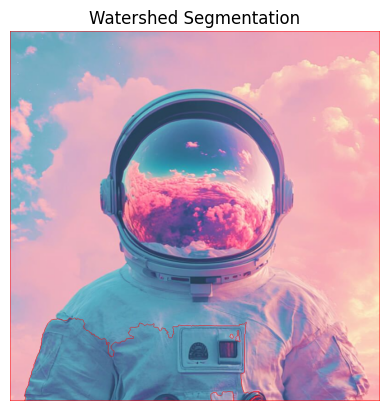

In [18]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_bg = cv2.dilate(binary, np.ones((3, 3), np.uint8), iterations=3)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Watershed Segmentation")
plt.show()